<a href="https://colab.research.google.com/github/AycaCicek/DogrusalOlmayanRegresyonModelleri/blob/main/LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import scale,StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
data=pd.read_csv("Hitters.csv")
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
data=data.dropna()
data_encoding=pd.get_dummies(data[["League","Division","NewLeague"]])
data_encoding.head(3)

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1


In [4]:
y=data["Salary"]
X_=data.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")
X=pd.concat([X_,data_encoding[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0


In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

Model ve Tahmin


In [6]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from lightgbm import LGBMRegressor

In [8]:
lgbm=LGBMRegressor().fit(X_train,y_train)

In [9]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [10]:
y_pred=lgbm.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

363.8712087611089

In [11]:
params={'learning_rate': [0.01,0.1,0.5,1],
        "max_depth": [1,2,3,4,5,6,7,8,9,10],
       "n_estimators": [20,40,100,200,500,1000],
        }

In [12]:
lgbm_cv_model=GridSearchCV(lgbm,params,cv=10,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=40; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=1,

In [13]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20}

In [14]:
lgbm_tuned=LGBMRegressor(learning_rate=0.1, max_depth= 6,n_estimators=20).fit(X_train,y_train)

In [15]:
y_pred=lgbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

371.5044868943621

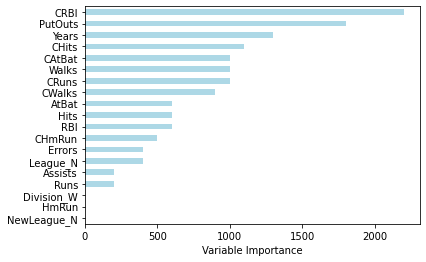

In [17]:
#degısken onem duzeyi
Importance=pd.DataFrame({"Importance": lgbm_tuned.feature_importances_*100},index=X_train.columns)
Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",color="lightblue",)
plt.xlabel("Variable Importance")
plt.gca().legend_ = None